# Spam Detection: Naive Bayes vs SVM

**Student Name:** Thomas Jones 
**Date:** 2/18/2026

In this project, you'll:
1. Load a spam email dataset
2. Train a Naive Bayes classifier
3. Train an SVM classifier
4. Compare the results

<small><i>Note</i>: This project was created with the assistance of AI</small>

---

## Step 1: Import Libraries and Load Data

In [21]:
# Import libraries
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

In [22]:
# Load the dataset
df = pd.read_csv('../data/spam_data.csv')

# Display first few rows
df.head()

,word_free,word_money,word_winner,word_click,word_urgent,num_exclamation,num_dollar,num_capitals,email_length,has_link,is_spam
0,0.116603,0.081405,0.248621,0.107026,0.084280,0.162809,0.042277,0.240659,101.836546,0.296066,0
1,0.150017,0.202468,0.071720,0.227412,0.228002,0.093779,0.123205,0.062907,90.571442,0.193681,0
2,0.009429,0.190923,0.094307,0.152571,0.272270,0.074788,0.123115,0.226665,130.369345,0.023094,0
3,0.085727,0.129830,0.205633,0.099737,0.016976,0.112176,0.283335,0.192520,98.526674,0.189685,0
4,0.050113,0.050286,0.011001,0.220921,0.199141,0.142389,0.253251,0.241701,96.637459,0.260481,0


## Step 2: Preprocessing the Data
* Clean the data
* Split the data into training and test sets.
* Feature Scaling

In [23]:
# Clean the data
print("Null counts:")
print(df.isna().sum())

print("\nSpam/Not Spam distribution:")
print(df['is_spam'].value_counts())

print("\nMax values for each column:")
print(df.max())

print("\nMin values for each column:")
print(df.min())

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale specific columns
columns_to_scale = ['word_money', 'word_winner', 'word_urgent', 'num_exclamation', 'num_dollar', 'email_length']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nMax values for each column after scaling:")
print(df.max())

print("\nMin values for each column after scaling:")
print(df.min())

Null counts:
word_free          0
word_money         0
word_winner        0
word_click         0
word_urgent        0
num_exclamation    0
num_dollar         0
num_capitals       0
email_length       0
has_link           0
is_spam            0
dtype: int64

Spam/Not Spam distribution:
is_spam
0    600
1    400
Name: count, dtype: int64

Max values for each column:
word_free            0.997347
word_money           1.498341
word_winner          1.491796
word_click           0.998332
word_urgent          1.497016
num_exclamation      1.998248
num_dollar           1.990861
num_capitals         0.999604
email_length       149.946068
has_link             0.995018
is_spam              1.000000
dtype: float64

Min values for each column:
word_free           0.001814
word_money          0.000009
word_winner         0.000003
word_click          0.001728
word_urgent         0.000040
num_exclamation     0.000068
num_dollar          0.000179
num_capitals        0.000470
email_length       20.27102

In [24]:
from sklearn.model_selection import train_test_split

# Split the data using a random state of 42 for reproducibility
X = df.drop('is_spam', axis=1)
y = df['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Step 3: Train Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_naive_bayes = model.predict(X_test)

Display your confusion matrix and your classification report.

In [27]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_naive_bayes)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_naive_bayes)}")

Confusion Matrix:
[[113   0]
 [  0  87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Step 4: Train k-Nearest Neighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=31, metric='euclidean')
knc.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",31
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [29]:
y_pred_k_nearest = knc.predict(X_test)

Display your confusion matrix and classification report.

In [30]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_k_nearest)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_k_nearest)}")

Confusion Matrix:
[[113   0]
 [  0  87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Step 5: Train SVM Classifier

In [31]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polykernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=1, coef0=1, C=5))
])

polykernel_svm_clf.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('svm_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",5
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",1
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'


In [32]:
y_pred_svm = polykernel_svm_clf.predict(X_test)

Display your confusion matrix and your classification report.

In [33]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_svm)}")

Confusion Matrix:
[[113   0]
 [  0  87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Step 6: Compare the Models
* Create graphs that compare model results
* Make calculations to compare model results

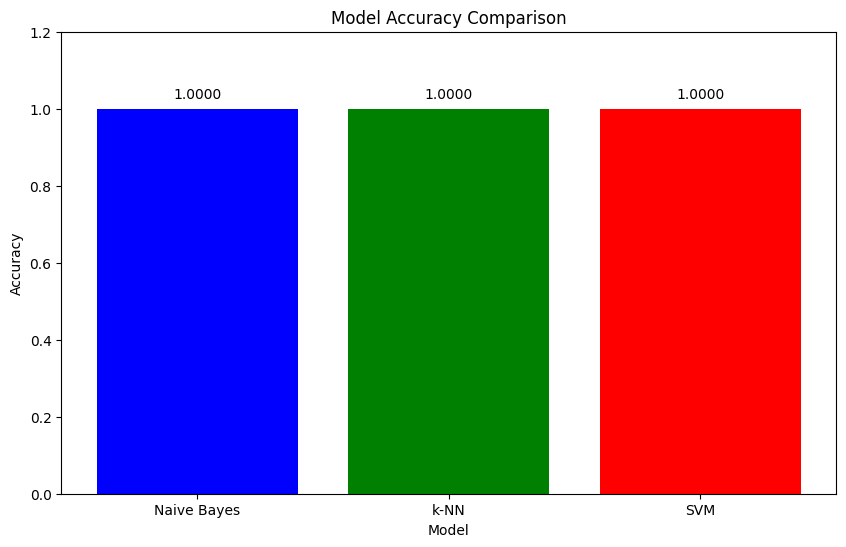

Naive Bayes Accuracy: 1.0000
k-NN Accuracy: 1.0000
SVM Accuracy: 1.0000


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
nb_accuracy = float(accuracy_score(y_test, y_pred_naive_bayes))
knn_accuracy = float(accuracy_score(y_test, y_pred_k_nearest))
svm_accuracy = float(accuracy_score(y_test, y_pred_svm))

# Create bar graph
models = ['Naive Bayes', 'k-NN', 'SVM']
accuracies = [nb_accuracy, knn_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1.2])
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', va='bottom')
plt.show()

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"k-NN Accuracy: {knn_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")


Discuss the results of your comparison.

## Step 7: Answer Discussion Questions

Based on your results, answer the following questions:

### Question 1: Which model performed better overall? Why do you think so?

**Your Answer:**

All of the models performed at 100% accuracy. There was not a single model that performed lower. 

---

### Question 2: What is the difference between accuracy and precision? Which is more important for spam detection?

**Your Answer:**

_[Write your answer here]_

---

### Question 3: When would you choose Naive Bayes over kNN or SVM in a real-world application?

**Your Answer:**

_[Write your answer here]_

---

### Question 4: What are the key assumptions of Naive Bayes? Do you think they hold true for this spam detection problem?

**Your Answer:**

_[Write your answer here]_

---

### Question 5: How did you determine your value for $k$ in the kNN model?

**Your Answer:**

We chose the value of k by taking the square root of the total number of data points, and then finding the prime number closest to that value. The square root of 1000 is ~31.62, so the closest prime number was 31. 

---

## Summary

In this project, you:
- ✅ Loaded and split a spam detection dataset
- ✅ Trained a Naive Bayes classifier
- ✅ Trained an SVM classifier  
- ✅ Compared both models using multiple metrics
- ✅ Analyzed the results

**Key Takeaways:**
1. Different algorithms can produce different results on the same data
2. Multiple metrics (accuracy, precision, recall) give a complete picture
3. Both Naive Bayes and SVM are effective for classification tasks
4. The choice of algorithm depends on the specific requirements of your problem